<a href="https://colab.research.google.com/github/vsvale/using-python-for-automation/blob/main/Using_Python_for_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repository

In [1]:
!git clone https://github.com/vsvale/using-python-for-automation.git

Cloning into 'using-python-for-automation'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 50 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.


# Files

In [2]:
inputfile_path = '/content/using-python-for-automation/Exercise_Files/inputFile.txt'

In [3]:
inputfile = open(inputfile_path,'r')
print(inputfile.read())
inputfile.close()

Mary 25 P
John 32 P
Dylan 19 F
Julia 23 F
Chad 17 F
Jack 20 F
Hailey 26 P
Iris 23 P
Jacob 29 P
Jalen 37 F
Anthony 47 F
Jamie 26 P
Sydney 19 F
Chloe 21 P
Natalie 29 P
David 23 P
Mario 51 P
Jenna 28 F
Josh 39 P
Damean 42 F
Zach 19 F
Kayla 28 P
Ben 14 F
Hunter 61 P
Albert 29 F
Lauren 31 F
Erica 16 P
Kyle 19 P
Jordan 29 F
Kaleb 47 F
Rosanna 45 P
Joy 28 P
Bill 29 F
Jim 67 P
Robin 24 F
Sansa 28 P
Juan 73 P
Colin 59 P
Jake 8 F
Kate 58 P
Jade 26 P
River 29 P
Chris 31 P
Grace 18 F


In [4]:
inputfile = open(inputfile_path,'r')
for line in inputfile:
  aproved = line.rstrip()[-1]
  if aproved == 'P':
    print(line)
inputfile.close()

Mary 25 P

John 32 P

Hailey 26 P

Iris 23 P

Jacob 29 P

Jamie 26 P

Chloe 21 P

Natalie 29 P

David 23 P

Mario 51 P

Josh 39 P

Kayla 28 P

Hunter 61 P

Erica 16 P

Kyle 19 P

Rosanna 45 P

Joy 28 P

Jim 67 P

Sansa 28 P

Juan 73 P

Colin 59 P

Kate 58 P

Jade 26 P

River 29 P

Chris 31 P



In [5]:
inputfile = open(inputfile_path,'r')
for line in inputfile:
  columns = line.split()
  if columns[2] == 'P':
    print(line)
inputfile.close()

Mary 25 P

John 32 P

Hailey 26 P

Iris 23 P

Jacob 29 P

Jamie 26 P

Chloe 21 P

Natalie 29 P

David 23 P

Mario 51 P

Josh 39 P

Kayla 28 P

Hunter 61 P

Erica 16 P

Kyle 19 P

Rosanna 45 P

Joy 28 P

Jim 67 P

Sansa 28 P

Juan 73 P

Colin 59 P

Kate 58 P

Jade 26 P

River 29 P

Chris 31 P



In [6]:
inputfile = open(inputfile_path,'r')
passfile = open('/content/using-python-for-automation/Exercise_Files/passFile.txt','w')
failfile = open('/content/using-python-for-automation/Exercise_Files/failFile.txt','w')
for line in inputfile:
  columns = line.split()
  if columns[2] == 'P':
    passfile.write(line)
  else:
    failfile.write(line)
inputfile.close()
passfile.close()
failfile.close()

# Subprocess

In [7]:
comand = "print('Hello World')"
example = open('/content/using-python-for-automation/Exercise_Files/example.py','w')
example.write(comand)
example.close()

In [8]:
!python /content/using-python-for-automation/Exercise_Files/example.py

Hello World


In [9]:
import subprocess
for i in range(5):
  subprocess.check_call(['python3','/content/using-python-for-automation/Exercise_Files/example.py'])

# Organize

In [10]:
import os
from pathlib import Path
import shutil

In [11]:
SUBDIRECTORIES = {
    "DOCUMENTS": [".pdf",".rtf",".txt",".csv","json"],
    "AUDIO": [".m4a",".m4b",".mp3"],
    "VIDEOS": [".mov",".avi",".mp4"],
    "IMAGES": [".jpg",".jpeg",".png"]
    }

In [12]:
def pickDirectory(value):
  for category,suffixes in SUBDIRECTORIES.items():
    for suffix in suffixes:
      if suffix == value:
        return category
  return 'MISC'

In [13]:
print(pickDirectory('.pdf'))

DOCUMENTS


In [14]:
print(pickDirectory('.none'))

MISC


In [15]:
%cd /content/using-python-for-automation/Exercise_Files/OrganizeMe

/content/using-python-for-automation/Exercise_Files/OrganizeMe


In [16]:
for item in os.scandir():
  print(item)

<DirEntry 'Random.mov'>
<DirEntry 'Random.m4a'>
<DirEntry 'Random.jpeg'>
<DirEntry 'Random.txt'>


In [17]:
def organizeDirectory():
  for item in os.scandir():
    if os.path.isdir(item): #dont move dirs
      continue
    filePath = Path(item) #path's file
    filetype = filePath.suffix.lower() #get suffix
    directory = pickDirectory(filetype) #what's the directory for this type of file
    directoryPath = Path(directory) #get the path to the right directory
    if directoryPath.is_dir() != True: #if directory don't exist create it
      directoryPath.mkdir()
    os.rename(filePath,directoryPath.joinpath(filePath)) #move file

In [18]:
organizeDirectory()

In [19]:
%cd /content/sample_data
organizeDirectory()

/content/sample_data


# Scraping

In [20]:
import requests
import lxml
from bs4 import BeautifulSoup

## Quotes

In [21]:
url = 'https://quotes.toscrape.com'

In [22]:
response = requests.get(url)

In [23]:
soup = BeautifulSoup(response.text,'lxml')

In [24]:
quotes_author = soup.find_all(['span','small'],class_=['text','author'])

In [25]:
quotes_clean = []
for quote in quotes_author:
  quotes_clean.append(quote.text.replace('“','').replace('”',''))
quotes_clean

['The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.',
 'Albert Einstein',
 'It is our choices, Harry, that show what we truly are, far more than our abilities.',
 'J.K. Rowling',
 'There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.',
 'Albert Einstein',
 'The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.',
 'Jane Austen',
 "Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.",
 'Marilyn Monroe',
 'Try not to become a man of success. Rather become a man of value.',
 'Albert Einstein',
 'It is better to be hated for what you are than to be loved for what you are not.',
 'André Gide',
 "I have not failed. I've just found 10,000 ways that won't work.",
 'Thomas A. Edison',
 "A woman is like a tea bag; you never know how strong it is until i

In [26]:
dict_quotes = {}
for i in range(0, len(quotes_clean), 2):
  quotes_list = []
  if quotes_clean[i+1] in dict_quotes:
    if isinstance(dict_quotes[quotes_clean[i+1]], list):
      quotes_list = dict_quotes[quotes_clean[i+1]]
      quotes_list.append(quotes_clean[i])
      dict_quotes[quotes_clean[i+1]] = quotes_list
    else:
      quotes_list.append(dict_quotes[quotes_clean[i+1]])
      quotes_list.append(quotes_clean[i])
      dict_quotes[quotes_clean[i+1]] = quotes_list
  else:
    dict_quotes[quotes_clean[i+1]] = quotes_clean[i]
dict_quotes

{'Albert Einstein': ['The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.',
  'There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.',
  'Try not to become a man of success. Rather become a man of value.'],
 'André Gide': 'It is better to be hated for what you are than to be loved for what you are not.',
 'Eleanor Roosevelt': "A woman is like a tea bag; you never know how strong it is until it's in hot water.",
 'J.K. Rowling': 'It is our choices, Harry, that show what we truly are, far more than our abilities.',
 'Jane Austen': 'The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.',
 'Marilyn Monroe': "Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.",
 'Steve Martin': 'A day without sunshine is like, you know, night.',
 'Thomas A. Edison':

In [27]:
def scrapquotes(url='https://quotes.toscrape.com',quotes_dict=[]):
  response = requests.get(url)
  soup = BeautifulSoup(response.text,'lxml')
  try:
    next_url = soup.find(class_='next').a['href']
  except:
    next_url = None
  quotes = soup.find_all('span',class_='text')
  authors = soup.find_all('small',class_='author')
  tags = soup.find_all('div',class_='tags')
  for i in range(len(quotes)):
    quoteTags = tags[i].find_all('a',class_='tag')
    listtag = []
    for quoteTag in quoteTags:
      listtag.append(quoteTag.text)
    intags = listtag
    inname = authors[i].text
    inquotes = quotes[i].text.replace('“','').replace('”','')

    quotes_dict.append({
    'Name': inname,
    'Quote': inquotes,
    'Tags': intags
    })
  url = 'https://quotes.toscrape.com'
  if next_url:
    return scrapquotes(url+next_url,quotes_dict)
  else:
    return quotes_dict

In [28]:
all_quotes = scrapquotes()
all_quotes

[{'Name': 'Albert Einstein',
  'Quote': 'The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.',
  'Tags': ['change', 'deep-thoughts', 'thinking', 'world']},
 {'Name': 'J.K. Rowling',
  'Quote': 'It is our choices, Harry, that show what we truly are, far more than our abilities.',
  'Tags': ['abilities', 'choices']},
 {'Name': 'Albert Einstein',
  'Quote': 'There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.',
  'Tags': ['inspirational', 'life', 'live', 'miracle', 'miracles']},
 {'Name': 'Jane Austen',
  'Quote': 'The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.',
  'Tags': ['aliteracy', 'books', 'classic', 'humor']},
 {'Name': 'Marilyn Monroe',
  'Quote': "Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.",
  'Tags': ['be-yourself', 'ins

In [29]:
def scrapquotes(url='https://quotes.toscrape.com',quotes_dict=[]):
  response = requests.get(url)
  soup = BeautifulSoup(response.text,'lxml')
  try:
    next_url = soup.find(class_='next').a['href']
  except:
    next_url = None
  quotes = soup.find_all('span',class_='text')
  authors = soup.find_all('small',class_='author')
  tags = soup.find_all('div',class_='tags')
  for i in range(len(quotes)):
    quoteTags = tags[i].find_all('a',class_='tag')
    listtag = []
    for quoteTag in quoteTags:
      listtag.append(quoteTag.text)
    intags = listtag
    inname = authors[i].text
    inquotes = quotes[i].text.replace('“','').replace('”','')

    quotes_dict.append({
    'Name': inname,
    'Quote': inquotes,
    'Tags': intags
    })
  url = 'https://quotes.toscrape.com'
  if next_url:
    return scrapquotes(url+next_url,quotes_dict)
  else:
    return quotes_dict

## Game Quotes

In [30]:
gamedesigning = 'https://www.gamedesigning.org/gaming/video-game-quotes/'

In [31]:
responsegd = requests.get(gamedesigning)

In [32]:
soupgd = BeautifulSoup(responsegd.content,'html.parser')

In [33]:
quotesgd = soupgd.find_all(['strong','h3'])

In [34]:
del quotesgd[12]

In [35]:
result = []

In [36]:
for quotegd in quotesgd:
  quotegd = quotegd.text.split('“',1)[1]
  quotegd = quotegd.split('” – ')
  result.append({
    'Name': quotegd[-1],
    'Quote': quotegd[0],
   })
result

[{'Name': 'Mass Effect 2',
  'Quote': 'I’m Commander Shepard, and this is my favorite store on the Citadel!'},
 {'Name': 'Duke Nukem',
  'Quote': 'It’s time to kick ass and chew bubble gum…and I’m all outta gum.'},
 {'Name': 'Castlevania: Symphony of the Night',
  'Quote': 'What is a man? A Miserable little pile of secrets!'},
 {'Name': 'We’re not tools of the government or anyone else. Fighting was the only thing I was good at, but at least I always fought for what I believed in.”– Metal Gear Solid',
  'Quote': 'We’re not tools of the government or anyone else. Fighting was the only thing I was good at, but at least I always fought for what I believed in.”– Metal Gear Solid'},
 {'Name': 'Max Payne',
  'Quote': 'They were all dead. The final gunshot was an exclamation mark to everything that had led to this point. I released my finger from the trigger. And then it was over.'},
 {'Name': 'Resident Evil', 'Quote': 'You were almost a Jill sandwich!'},
 {'Name': 'Assassin’s Creed II', 'Quo

## Clothes

In [37]:
url = 'https://scrapingclub.com/exercise/list_basic/'

In [38]:
response = requests.get(url)

In [39]:
soup = BeautifulSoup(response.text,'lxml')

In [40]:
items = soup.find_all('div',class_='col-lg-4 col-md-6 mb-4')

In [41]:
for i in items:
  itemName = i.find('h4',class_='card-title').text.rstrip().lstrip()
  itemPrice = i.find('h5').text.rstrip().lstrip()
  print(itemName,itemPrice)

Short Dress $24.99
Patterned Slacks $29.99
Short Chiffon Dress $49.99
Off-the-shoulder Dress $59.99
V-neck Top $24.99
Short Chiffon Dress $49.99
V-neck Top $24.99
V-neck Top $24.99
Short Lace Dress $59.99


In [42]:
pages = soup.find('ul', class_='pagination')

In [43]:
urls = []

In [44]:
links = pages.find_all('a',class_='page-link')

In [45]:
for link in links:
  pageNum = int(link.text) if link.text.isdigit() else None
  if pageNum != None:
    x = link.get('href')
    urls.append(x)

In [46]:
for i in urls:
  newUrl = url + i
  response = requests.get(newUrl)
  soup = BeautifulSoup(response.text,'lxml')
  items = soup.find_all('div',class_='col-lg-4 col-md-6 mb-4')
  for n in items:
    itemName = n.find('h4',class_='card-title').text.rstrip().lstrip()
    itemPrice = n.find('h5').text.rstrip().lstrip()
    print(itemName,itemPrice)

Fitted Dress $34.99
V-neck Jumpsuit $69.99
Chiffon Dress $54.99
Skinny High Waist Jeans $39.99
Super Skinny High Jeans $19.99
Oversized Denim Jacket $19.99
Short Sweatshirt $24.99
Long-sleeved Jersey Top $12.99
Skinny High Waist Jeans $39.99
Short Sweatshirt $24.99
Long-sleeved Jersey Top $12.99
Long-sleeved Jersey Top $12.99
Jersey Dress $19.99
Short Sweatshirt $24.99
Crinkled Flounced Blouse $24.99
Bib Overall Dress $29.99
Loose-knit Sweater $17.99
Skinny Regular Jeans $29.99
Henley-style Top $12.99
Joggers $17.99
Skirt with Lacing $34.99
Top with Tie $17.99
Joggers $34.99
Chiffon Dress with Flounce $49.99
Skirt with Lacing $34.99
V-neck Top $9.99
Hooded Jacket $29.99
Hooded Top $29.99
Lyocell-blend Blouse $34.99
Bib Overall Dress $29.99
Wide-leg Pants $34.99
Ankle-length Slim-fit Pants $24.99
Short Sweatshirt $9.99
V-neck Blouse $17.99
Short Skirt $24.99
Mesh T-shirt $17.99
Blouse with Embroidery $59.99
Wide-cut Cotton Top $34.99
Pleated Skirt $54.99
Coat $69.99
Wide-leg Pants $49.9

In [47]:
def scrapclothes(url='https://scrapingclub.com/exercise/list_basic/',clothes=[]):
  response = requests.get(url)
  soup = BeautifulSoup(response.text,'lxml')
  try:
    next = soup.find_all('a',class_='page-link')
    for urls in next:
      next_url = None
      if urls.text == 'Next':
        next_url = urls['href']
  except:
    next_url = None
  itens = soup.find_all(class_='card-title')
  url_detail = 'https://scrapingclub.com'
  for iten in itens:
    link = iten.a['href']
    
    detail = requests.get(url_detail+link)
    detail.encoding = "utf-8"
    clothdetail = BeautifulSoup(detail.text,'html.parser')
    card = clothdetail.find('div',class_='card')

    iname = card.find('h3',class_='card-title').text
    image = url_detail + card.find('img',class_='card-img-top')['src']
    price = card.find('h4').text
    description = card.find('p',class_='card-text').text
    clothes.append({
    'Item': iname,
    'Price': price,
    'Image': image,
    'Description': description
    })
  
  url='https://scrapingclub.com/exercise/list_basic/'

  if next_url:
    return scrapclothes(url+next_url,clothes)
  else:
    return clothes

In [48]:
all_clothes = scrapclothes()
all_clothes

[{'Description': 'Short dress in woven fabric. Round neckline and opening at back of neck with a button. Yoke at back with concealed pleats, long sleeves, and narrow cuffs with ties. Side pockets. 100% polyester. Machine wash cold.',
  'Image': 'https://scrapingclub.com/static/img/90008-E.jpg',
  'Item': 'Short Dress',
  'Price': '$24.99'},
 {'Description': 'Ankle-length slacks in patterned stretch cotton satin. Regular waist with concealed hook-and-eye fastener and zip fly. Side pockets and tapered legs with slits at hems. 61% cotton, 36% polyester, 3% spandex. Machine wash...',
  'Image': 'https://scrapingclub.com/static/img/96436-A.jpg',
  'Item': 'Patterned Slacks',
  'Price': '$29.99'},
 {'Description': 'Short V-neck dress in plumeti chiffon. Gathers and small ruffle at shoulders, dropped shoulders, and long, wide sleeves with buttons at cuffs. Narrow, elasticized seam at waist and circle skirt with ruffled tiers. Lined. 100% polyester. Machine wash warm.',
  'Image': 'https://scr

# Automate web browsing

In [49]:
!pip install kora -q

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 


In [50]:
from kora.selenium import wd

## Single Input Field

In [51]:
wd.get('https://www.seleniumeasy.com/test/basic-first-form-demo.html')

In [53]:
messageField = wd.find_element_by_xpath('//*[@id="user-message"]')

In [54]:
messageField.send_keys('Hello Vini')

In [55]:
ShowMessagebt = wd.find_element_by_xpath('//*[@id="get-input"]/button')

In [56]:
wd.execute_script("arguments[0].click();", ShowMessagebt)

In [57]:
ResultMessage = wd.find_element_by_xpath('//*[@id="display"]')

In [58]:
print(ResultMessage.text)

Hello Vini


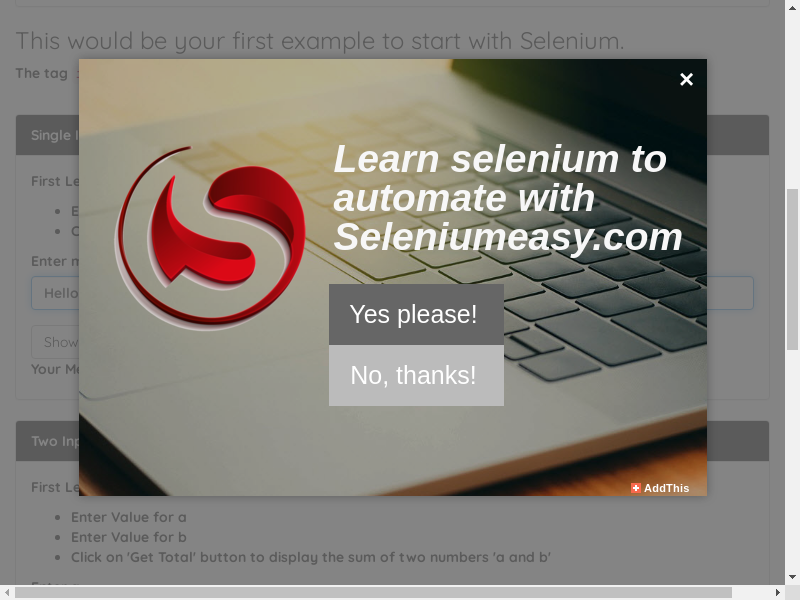

In [59]:
wd

## Two Input Fields

In [60]:
wd.get('https://www.seleniumeasy.com/test/basic-first-form-demo.html')

In [62]:
Entera = wd.find_element_by_xpath('//*[@id="sum1"]')

In [63]:
Enterb = wd.find_element_by_xpath('//*[@id="sum2"]')

In [64]:
GetTotal = wd.find_element_by_xpath('//*[@id="gettotal"]/button')

In [65]:
valueA = 10
valueB = 5

In [66]:
Entera.send_keys(str(valueA))

In [67]:
Enterb.send_keys(str(valueB))

In [68]:
wd.execute_script("arguments[0].click();", GetTotal)

In [69]:
ResultSum = wd.find_element_by_xpath('//*[@id="displayvalue"]')

In [70]:
print(ResultSum.text)

15


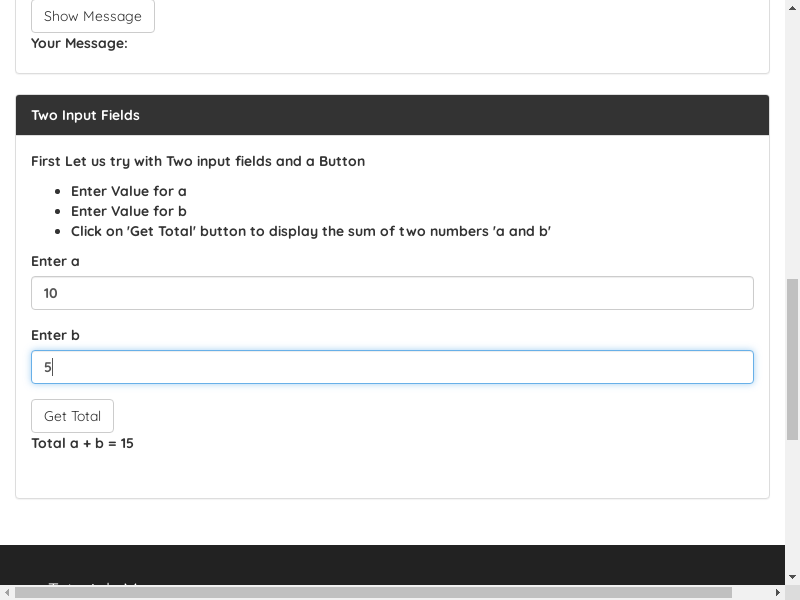

In [71]:
wd

## Single Checkbox Demo

In [72]:
wd.get('https://www.seleniumeasy.com/test/basic-checkbox-demo.html')

In [74]:
checkbox = wd.find_element_by_xpath('//*[@id="isAgeSelected"]')

In [75]:
checkbox.click()

In [76]:
ResultSucess = wd.find_element_by_xpath('//*[@id="txtAge"]')

In [77]:
ResultSucess.text

'Success - Check box is checked'

## Drag and Drop

In [79]:
from selenium.webdriver.common.action_chains import ActionChains

In [80]:
wd.get('http://www.dhtmlgoodies.com/scripts/drag-drop-custom/demo-drag-drop-3.html')

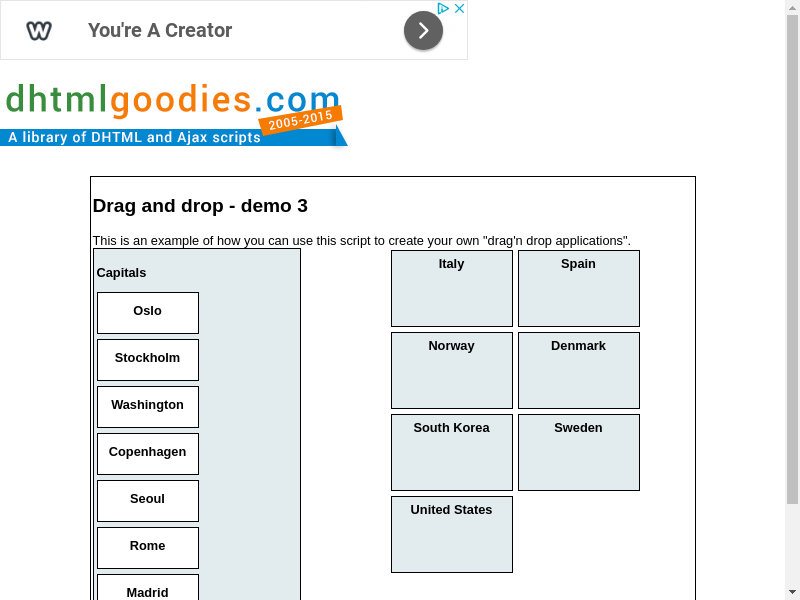

In [81]:
wd

In [82]:
Italy = wd.find_element_by_xpath('//*[@id="box106"]')

In [83]:
Spain = wd.find_element_by_xpath('//*[@id="box107"]')

In [84]:
Norway = wd.find_element_by_xpath('//*[@id="box101"]')

In [85]:
Denmark = wd.find_element_by_xpath('//*[@id="box104"]')

In [86]:
South_Korea = wd.find_element_by_xpath('//*[@id="box105"]')

In [87]:
Sweden = wd.find_element_by_xpath('//*[@id="box102"]')

In [88]:
United_States = wd.find_element_by_xpath('//*[@id="box103"]')

In [89]:
countries = [Italy,Spain,Norway,Denmark,South_Korea,Sweden,United_States]

In [90]:
Rome = wd.find_element_by_xpath('//*[@id="box6"]')

In [91]:
Oslo = wd.find_element_by_xpath('//*[@id="box1"]')

In [92]:
Madrid = wd.find_element_by_xpath('//*[@id="box7"]')

In [93]:
Copenhagen = wd.find_element_by_xpath('//*[@id="box4"]')

In [94]:
Stockholm = wd.find_element_by_xpath('//*[@id="box2"]')

In [95]:
Washington = wd.find_element_by_xpath('//*[@id="box3"]')

In [96]:
cities = [Rome,Oslo,Madrid,Copenhagen,Stockholm,Washington]

In [97]:
actions = ActionChains(wd)

In [98]:
for city in cities:
  for country in countries:
    actions.drag_and_drop(city,country).perform()
    if city.value_of_css_property('background-color') == 'rgba(0, 255, 0, 1)':
      break


In [99]:
for city in cities:
  print(city.value_of_css_property('background-color'))

rgba(0, 255, 0, 1)
rgba(0, 255, 0, 1)
rgba(0, 255, 0, 1)
rgba(0, 255, 0, 1)
rgba(0, 255, 0, 1)
rgba(0, 255, 0, 1)


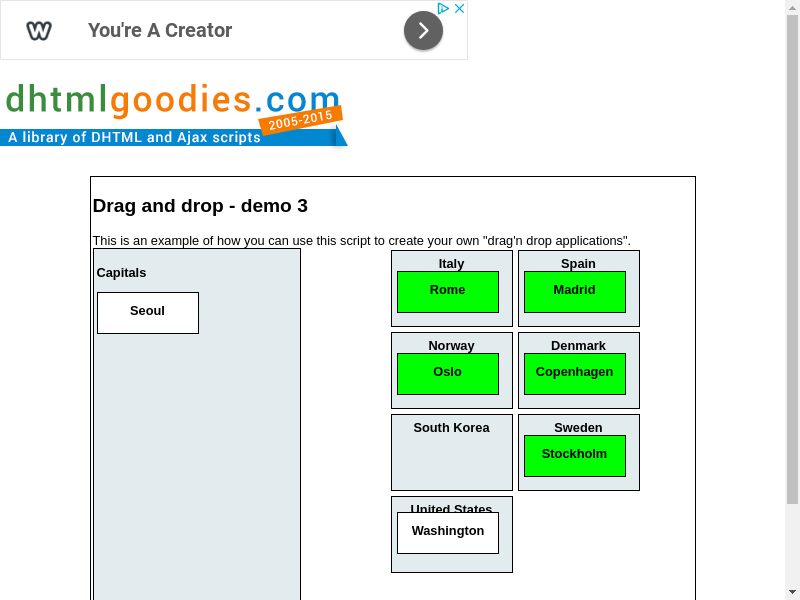

In [100]:
wd

## Wait

In [101]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [102]:
url = 'https://www.google.com/earth/'

In [103]:
wd.get(url)

In [104]:
wait = WebDriverWait(wd,10)

In [105]:
waitgotoEarth = wait.until(EC.element_to_be_clickable((By.XPATH,'/html/body/div[1]/div/div[2]/div/div[4]/a[3]/span/span')))

In [106]:
waitgotoEarth.click()

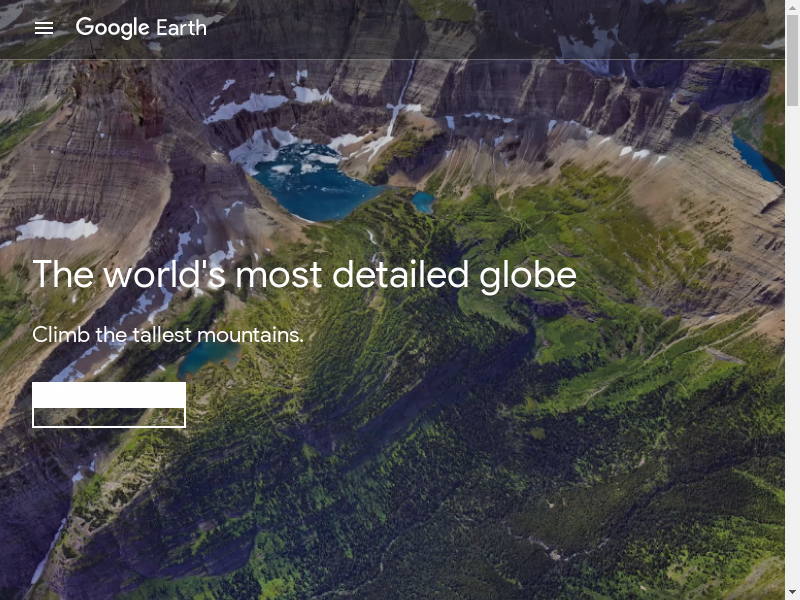

In [107]:
wd

# API

## Ean

In [108]:
import requests
from IPython.display import Image, display

In [109]:
baseUrl = 'https://api.upcitemdb.com/prod/trial/lookup'

In [110]:
parameters = {'upc':'4070071967072'}
# parameters = {'upc':'073366118238'}

In [111]:
response = requests.get(baseUrl,params=parameters)

In [112]:
print(response.url)

https://api.upcitemdb.com/prod/trial/lookup?upc=4070071967072


In [113]:
content = response.json()
content

{'code': 'OK',
 'items': [{'brand': '',
   'category': 'Apparel & Accessories',
   'color': 'Multicoloured',
   'description': '',
   'dimension': '',
   'ean': '4070071967072',
   'elid': '402530210166',
   'highest_recorded_price': 109,
   'images': ['https://i3.onbuy.com/product/74cc13ca635b458184295eb5ac7baaa9-l30563816.jpg'],
   'lowest_recorded_price': 6.99,
   'model': '',
   'offers': [{'availability': '',
     'condition': 'New',
     'currency': 'GBP',
     'domain': 'onbuy.com',
     'link': 'https://www.upcitemdb.com/norob/alink/?id=y2o233v2z2x27494w2&tid=1&seq=1610417976&plt=7d258d6fa33d235258d3dfc26970d991',
     'list_price': '',
     'merchant': 'OnBuy.com',
     'price': 14.93,
     'shipping': 'GB:Mainland UK:Standard:0.00 GBP',
     'title': '6 PCS GORILLA SUPER GLUE 3g IMPACT TOUGH STRENGTH ADHESIVE 10 SECONDS BOND ANTI CLOG',
     'updated_t': 1571468426}],
   'size': 'XL',
   'title': 'Pink Floyd-december Moon-lim. Edition 4 Cd Sealed Boxset/free Shipping.',
   'w

In [114]:
details = content['items'][0]

In [115]:
images = details['images']
images

['https://i3.onbuy.com/product/74cc13ca635b458184295eb5ac7baaa9-l30563816.jpg']

In [116]:
offers = details['offers'][0]
offers

{'availability': '',
 'condition': 'New',
 'currency': 'GBP',
 'domain': 'onbuy.com',
 'link': 'https://www.upcitemdb.com/norob/alink/?id=y2o233v2z2x27494w2&tid=1&seq=1610417976&plt=7d258d6fa33d235258d3dfc26970d991',
 'list_price': '',
 'merchant': 'OnBuy.com',
 'price': 14.93,
 'shipping': 'GB:Mainland UK:Standard:0.00 GBP',
 'title': '6 PCS GORILLA SUPER GLUE 3g IMPACT TOUGH STRENGTH ADHESIVE 10 SECONDS BOND ANTI CLOG',
 'updated_t': 1571468426}

In [117]:
print(offers['title'],'- $',offers['price'],)
for imageName in images:
    display(Image(url=imageName,width=350, height=350))

6 PCS GORILLA SUPER GLUE 3g IMPACT TOUGH STRENGTH ADHESIVE 10 SECONDS BOND ANTI CLOG - $ 14.93


## OpenWeather

create an account in https://openweathermap.org/ and use your api key

In [118]:
import requests
from getpass import getpass
apikey = getpass(prompt='Your API KEY for OpenWeather:')

Your API KEY for OpenWeather:··········


In [119]:
baseUrl = 'http://api.openweathermap.org/data/2.5/forecast'

In [120]:
parameters = {'APPID':str(apikey),'q':'Sao Paulo,BR'}

In [121]:
response = requests.get(baseUrl,params=parameters)

In [122]:
content = response.json()

In [123]:
for day in content['list']:
  print(day['dt_txt'],day['weather'][0]['description'])

2021-01-12 03:00:00 broken clouds
2021-01-12 06:00:00 overcast clouds
2021-01-12 09:00:00 overcast clouds
2021-01-12 12:00:00 broken clouds
2021-01-12 15:00:00 light rain
2021-01-12 18:00:00 moderate rain
2021-01-12 21:00:00 moderate rain
2021-01-13 00:00:00 moderate rain
2021-01-13 03:00:00 light rain
2021-01-13 06:00:00 light rain
2021-01-13 09:00:00 light rain
2021-01-13 12:00:00 overcast clouds
2021-01-13 15:00:00 light rain
2021-01-13 18:00:00 moderate rain
2021-01-13 21:00:00 moderate rain
2021-01-14 00:00:00 overcast clouds
2021-01-14 03:00:00 overcast clouds
2021-01-14 06:00:00 light rain
2021-01-14 09:00:00 overcast clouds
2021-01-14 12:00:00 light rain
2021-01-14 15:00:00 moderate rain
2021-01-14 18:00:00 moderate rain
2021-01-14 21:00:00 moderate rain
2021-01-15 00:00:00 moderate rain
2021-01-15 03:00:00 overcast clouds
2021-01-15 06:00:00 overcast clouds
2021-01-15 09:00:00 light rain
2021-01-15 12:00:00 light rain
2021-01-15 15:00:00 light rain
2021-01-15 18:00:00 moderate